In [52]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/processed.csv")
df_data = pd.read_csv("../data/cleaned.csv")

In [117]:
treshold = 35
df_old = df[df['Age'] >=  treshold]
df_young = df[df['Age'] < treshold]
df_young

,Unnamed: 0,Account Status,Duration,Credit History,Purpose,Credit Amount,Savings,Employment,Installment rate,Sex,...,Age,Other installments,Housing,Number of credits,Job,Maintenance,Telephone,Foreign,label_value,score
1,1,<200,48,existing credits paid back duly till now,radio/television,5951,<100,1 <= < 4 years,2,female divorced/separated/married,...,22,none,own,1,skilled employee / official,1,none,yes,0,0.0
9,9,<200,30,critical account,car (new),5234,<100,unemployed,4,male married/widowed,...,28,none,own,2,management/ highly qualified employee,1,none,yes,0,0.0
10,10,<200,12,existing credits paid back duly till now,car (new),1295,<100,< 1 year,3,female divorced/separated/married,...,25,none,rent,1,skilled employee / official,1,none,yes,0,0.0
11,11,<0,48,existing credits paid back duly till now,business,4308,<100,< 1 year,3,female divorced/separated/married,...,24,none,rent,1,skilled employee / official,1,none,yes,0,0.0
12,12,<200,12,existing credits paid back duly till now,radio/television,1567,<100,1 <= < 4 years,1,female divorced/separated/married,...,22,none,own,1,skilled employee / official,1,yes,yes,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,992,<0,18,existing credits paid back duly till now,radio/television,1936,no,4 <= < 7 years,2,male married/widowed,...,23,none,rent,2,unskilled - resident,1,none,yes,1,1.0
993,993,<0,36,existing credits paid back duly till now,furniture/equipment,3959,<100,unemployed,4,male single,...,30,none,own,1,management/ highly qualified employee,1,yes,yes,1,0.0
995,995,no,12,existing credits paid back duly till now,furniture/equipment,1736,<100,4 <= < 7 years,3,female divorced/separated/married,...,31,none,own,1,unskilled - resident,1,none,yes,1,1.0
998,998,<0,45,existing credits paid back duly till now,radio/television,1845,<100,1 <= < 4 years,4,male single,...,23,none,for free,1,skilled employee / official,1,yes,yes,0,0.0


Confusion matrix: old customers


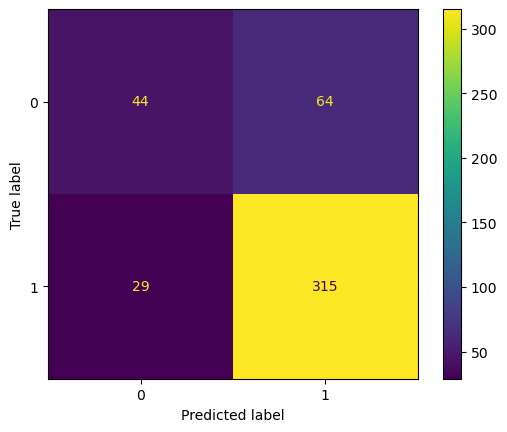

In [118]:
cm = confusion_matrix(df_old['label_value'], df_old['score'])
ConfusionMatrixDisplay(cm).plot()
print("Confusion matrix: old customers")

Confusion matrix: young customers


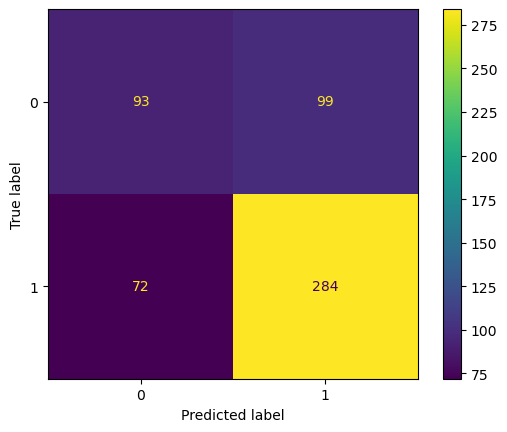

In [119]:
cm = confusion_matrix(df_young['label_value'], df_young['score'])
ConfusionMatrixDisplay(cm).plot()
print("Confusion matrix: young customers")

In [120]:
def fairness_stats(y_pred, y):
    TP = np.sum(y[y_pred == y] == 1)
    TN = np.sum(y[y_pred == y] == 0)
    FP = np.sum(y[y_pred != y] == 1)
    FN = np.sum(y[y_pred != y] == 0)

    group_fair = (TP+FP) / len(y)
    sufficiency = (TP+FN) / (TP+FP)
    separation = (TP+FP) / (TP+FN)
    Eq_opp = TP / (TP+FP)
    avg_odd = Eq_opp - ((FP) / (TP+FP))
    

    return [group_fair, sufficiency, separation, Eq_opp, avg_odd]


old_stat = fairness_stats(df_old['label_value'], df_old['score'])
young_stat = fairness_stats(df_young['label_value'], df_young['score'])
print(f"old {old_stat}")
print(f"young {young_stat}")
print(f"dif {np.array(young_stat) - np.array(old_stat)}")


old [0.838495575221239, 0.9076517150395779, 1.1017441860465116, 0.8311345646437994, 0.6622691292875988]
young [0.698905109489051, 0.9295039164490861, 1.0758426966292134, 0.741514360313316, 0.4830287206266319]
dif [-0.13959047  0.0218522  -0.02590149 -0.0896202  -0.17924041]
